# 3.3 Realistic Pendula

<b>Realistic</b> (or nonlinear pendula) are pendula that do not use the small angle approximation. If there is  a periodic driving torque, then the pendula system is referred to as <b>chaotic</b>.

A chaotic pendulum can be described by the ODE:

\begin{align*}
    &\frac{d^2\theta}{dt^2} = -\omega_0^2 \sin\theta - \alpha \frac{d\theta}{dt} + f\cos\omega t \\
    &\omega_0 = \frac{mgl}{I}, \quad \alpha= \frac{\beta}{I}, \quad  f =\frac{\tau_0}{I}
\end{align*}

$\omega_0$ is the natural frequency, $\alpha$ arises from friction, and $f$ measures the strength of the torque.

<i>This is a difficult system to study with a computer because of the large parameter space $(\omega_0, \alpha, f, \omega)$ and the fact that system is hypersenstive to the parameters.</i>

In [9]:
# Import the rk4 method from a different file
import os, sys
SCRIPT_DIR = os.path.dirname(os.path.abspath('C:/Users/Dylan/OneDrive/Documents/Coding/LearningNumericalMethods/Chapter 3/3.3 Realistic Pend.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from RungeKutta.rk4Algo import dsbRK4
from Integrals.integralAlgos import gaussQuad

from IPython import display
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75


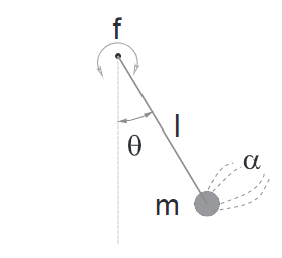

In [10]:
display.Image("../images/real_pen.png")

Let's consider an undriven realistic pendulum without friction:

\begin{equation*}
    \frac{d^2\theta}{dt^2} = -\omega_0^2 \sin\theta
\end{equation*}

To solve it numerically, let's make confirm the energy stays constant as time progresses. To do this, we want to compute the initial energy $E_0$ and the energy at a particular time $E(t)$.

\begin{align*}
    E_0 &= mgl(1-cos\theta_0) = 2mgl\sin^2(\theta_0/2) \\
    E(t) &= 2mgl\sin^2(\theta /2) + \frac{1}{2}ml^2\dot{\theta}^2
\end{align*} 

From this, notice that this pendulum <font color=red><i>starts from rest</i></font> with initial displacement $\theta_0$

In [11]:
def realPen(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. This models a realistic pendulum with no friction and no driving force.
    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    # Creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    # This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -(g/l)*np.sin(y[0])

    return v


In [12]:
def findEnergies(theta, omega):
    """
    Parameters
    -----------
    array: the array of thetas and omega

    Returns
    ------
    E : list
        Encapsulates the kinetic, potential, and total energy
    """

    n = theta.size

    K = np.empty(n)
    U = np.empty(n)
    E = np.empty(n)

    for i in range(0, n):
        K[i] = 0.5*m*(l**2)*((omega[i])**2)
        U[i] = 2*m*g*l*(np.sin(theta[i]/2))**2

        E[i] = (K[i]+U[i])

    return K, U, E


In [13]:
m, g, l, theta0 = 1, 9.8, (9.8)/2, 0
thetas = [np.pi/15, np.pi*(5/6), np.pi, (11/12)*np.pi]

for i in range(4):
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([thetas[i], 0.5], realPen, 2, 3000, 1/100)
    vars()['theta'+str(i)], vars()['omega'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]
    vars()['E'+str(i)] = findEnergies(vars()['theta'+str(i)], vars()['omega'+str(i)])

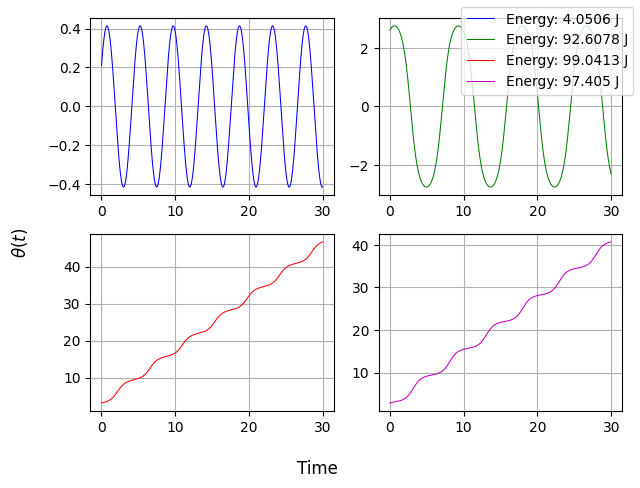

In [14]:
kin, kaxs = plt.subplots(2, 2)

kaxs[0][0].plot(t0, theta0, 'b', label='Energy: ' +
                str(round(E0[2][0], 4)) + " J")
kaxs[0][1].plot(t1, theta1, 'g', label='Energy: ' +
                str(round(E1[2][0], 4)) + " J")
kaxs[1][0].plot(t2, theta2, 'r', label='Energy: ' +
                str(round(E2[2][0], 4)) + " J")
kaxs[1][1].plot(t3, theta3, 'm', label='Energy: ' +
                str(round(E3[2][0], 4)) + " J")

kin.legend()
kin.supylabel('$\\theta(t)$')
kin.supxlabel("Time")
plt.show()

del coords1, t1, theta1, omega1, coords2, t2, theta2, omega2, coords3, t3, theta3, omega3, coords0, t0, theta0, omega0, kin, kaxs, E1, E2, E3, E0

The graphs above depict what happens with our semi-realistic pendulum when the initial energy of the system increases. The first three situations start with $\dot{\theta}(0) = 0$ and we gradually change the initial angular position to see what occurs. From the graphs above, there is a drastic difference between the behavior shown in the top row versus the bottom row.

<b><i>What the hell is going on then?</b></i>

Well, in the bottom row, the pendulum had enough initial total energy to have kinetic energy at the very top. It continues to swing in a circle as opposed to simple harmonic motion. In fact, starting at the very top means you'll never move because there's no kinetic energy. To go in a circle, you need to have more energy than the maximum potential energy that could be reached in the swing which is

\begin{equation*}
    U = 2mgl
\end{equation*}

If the pendulum has less total energy than that, there will be a turning point and oscillate. If there's more total energy, the pendulum will no longer be in periodic motion and instead be in circular motion

<b><i>What else is interesting about the motion?</i></b>

Well notice that the period for the oscilaltory motion somehow depends on the initial angluar position of the oscillator. This unlike the simple pendulum which was 

\begin{equation}
    T_0 = 2\pi\sqrt{\frac{l}{g}}
\end{equation}

We'll discuss this next!

## 3.3.2 Elliptic Integrals



Using conservation of energy, we can derive an expression for the angular velocity of the pendulum

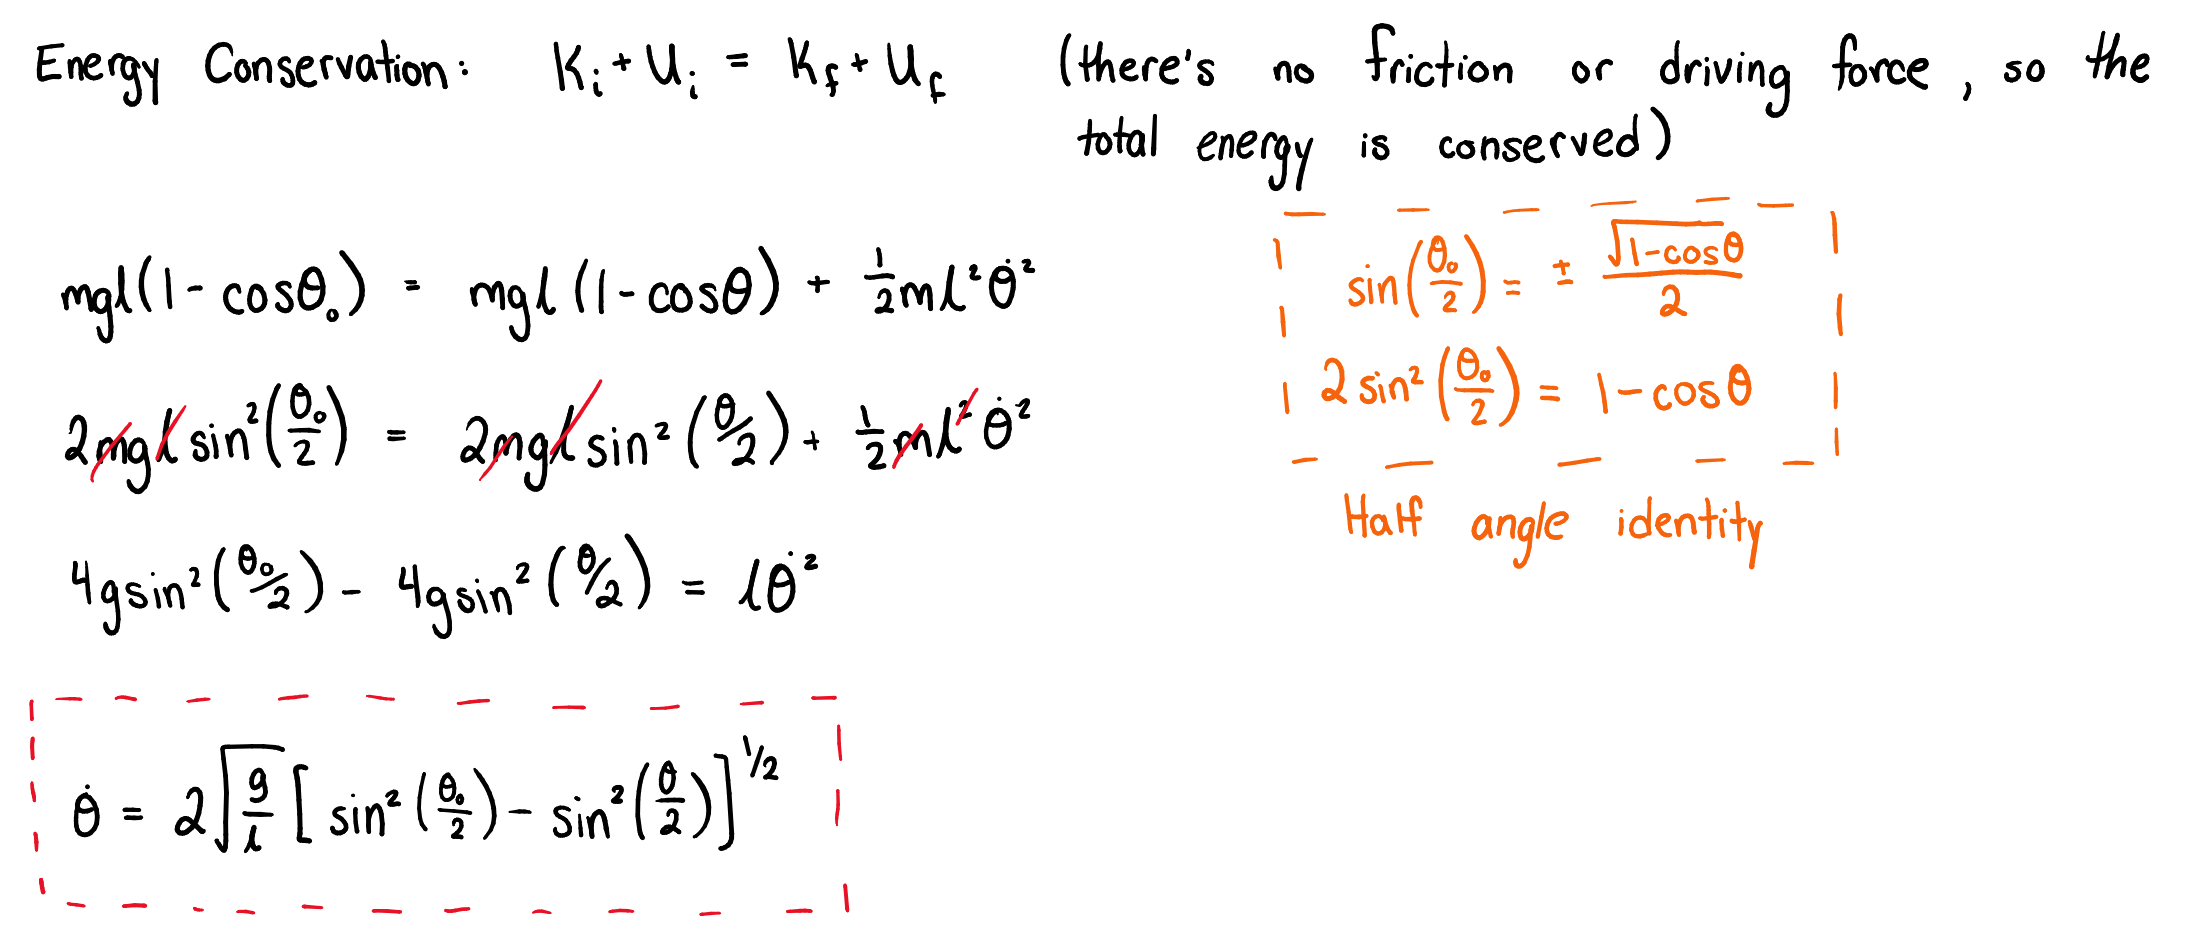

In [15]:
display.Image('..\images\energy derivation.png')

With this, we can integrate both sides of the expression and find an expression for the period of a pendulum that depends on the initial position.

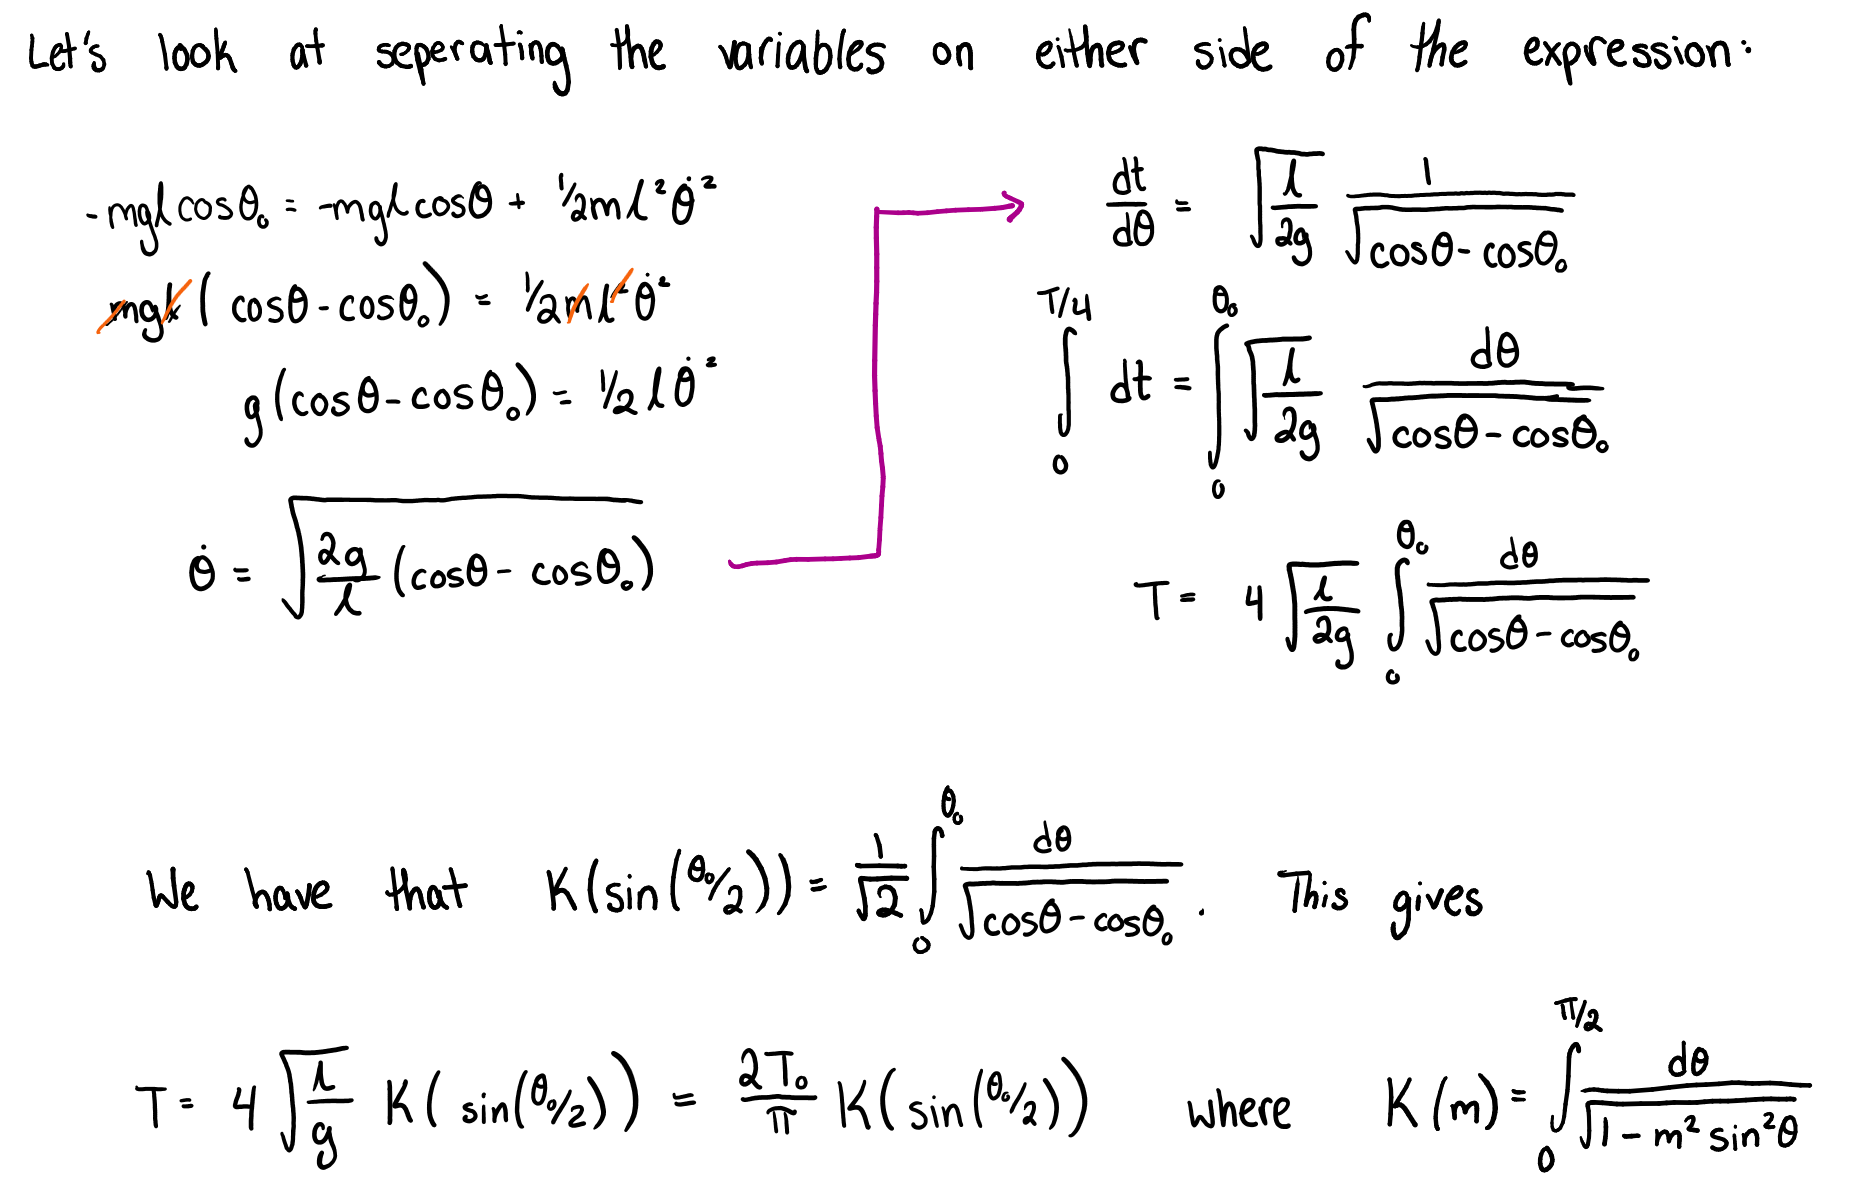

In [16]:
display.Image('..\images\period_deriv.png')

With this form of the period, Gaussian quadrature can be used to determine the ratio:

\begin{equation*}
    \frac{T}{T_0} = \frac{2}{\pi} K(\sin(\theta_0/2))
\end{equation*}

Below, we will use Gaussian quadrature and power series to determine the period ratios for different initial conditions. The first cell does the Gaussian quadrature.

In [17]:
# Initialize the inital angles and a place to store the ratio
q = 10
thetas = np.linspace(0, np.pi, q)
ratio = np.zeros(q)
ratio1 = np.zeros(q)

# Define the complete elliptic integral of the first kind


def K(x):
    m = np.sin(theta0/2)
    return 1/np.sqrt(1-(m*m)*(np.sin(x)**2))


# Sets the parameters for the gaussQuad
a = 0
b = np.pi/2
n = 12
eps = 3E-16

# Implements the equation above for different inital angular displacements
for i in range(0, len(thetas)):
    theta0 = thetas[i]
    ratio[i] = (2/np.pi)*gaussQuad(K, n, a, b, eps)
    ratio1[i] = (2/np.pi)*gaussQuad(K, 100, a, b, eps)

The next cell applies the legendre polynomial solution. It can be found here https://en.wikipedia.org/wiki/Pendulum_(mechanics)

In [18]:
# Initialize the array for the ratios calculated from the power series solution and the amount of terms to add
ratioPow = np.zeros(q)
degree = 1000

# Implements a Legendre polynomial solution from wikipedia
for i in range(0, len(thetas)):
    theta0 = thetas[i]
    constants = np.zeros(6)

    for j in range(0, degree):
        numerator = np.math.factorial(2*j)
        denominator = ((2**j)*np.math.factorial(j))**2
        ratioPow[i] += ((numerator/denominator)**2)*((np.sin(theta0/2))**(2*j))

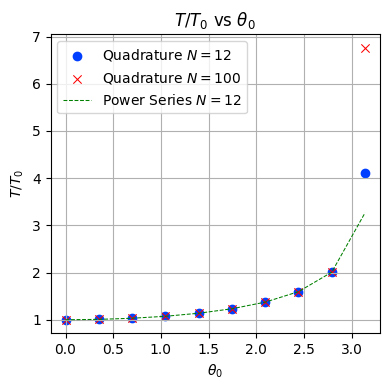

In [19]:
plt.figure(figsize=(4, 4))
plt.scatter(thetas, ratio, label='Quadrature $N=12$')
plt.scatter(thetas, ratio1, marker='x',
            color='red', label='Quadrature $N=100$')
plt.plot(thetas, ratioPow, 'g--', label='Power Series $N=12$')
plt.title('$T/T_0$ vs $\\theta_0$')
plt.xlabel('$\\theta_0$')
plt.ylabel('$T/T_0$')
plt.legend()
plt.show()

del q, thetas, ratio, ratio1, a, b, n, eps, ratioPow, degree, numerator, denominator, constants, theta0

From the graph, it is clear to see the ratio increases as the pendulum is dropped from rest at larger angles. Thankfully, this behavior is independent of the solution method we use. 

<b><i>Why did you plot the quadrature result using two different N's (the amount of intergration points)?</b></i>

Well, I had noticed the ratio of the period stays consistent in the interval $[0, \pi)$ no matter the amount of intergration points used. However, at $\theta_0 = \pi$, the ratio of periods only gets larger. The pendulum is begin released at the <i>separatix</i> (i.e. at the top) which means the pendulum is at that unstable equilibrium and will have an infinite period. The discreteness of the solution only allows for a larger finite number, unless you take the $N \rightarrow \infty$

This behavior also occurs in the power series solution as you increase the degree of the polynomial.

The code cell below will confirm the ratio of the period calculated using these two methods.

In [20]:
coords, t = dsbRK4([1.3962634, 0], realPen, 2, 300, 1/10)
theta, omega = coords[0], coords[1]

# Picks out the roots from the numpy array. This is so suspetible to the error that is put in, but I don't have any other way to do it currently!!
roots = []

for i in range(0, theta.size):
    if abs(theta[i]) < 0.09:
        roots.append(t[i])

# Finds the average of the half periods
sums = 0
count = 0
for i in range(0, len(roots)-1):
    sums += roots[i+1]-roots[i]
    count += 1

# Calculates the full period and the ratio
T = 2*(sums/count)
T_0 = (2*np.pi)/np.sqrt(g/l)

print('Period from period finder: ' + str(T/T_0))

del T, T_0, coords, t, theta, omega, roots, sums, count

Period from period finder: 1.137672435871258


<b><i>How did we do the comparison?</b></i>

We used a model generated by the RK4 algorithm, then counted the period like anyone would with a stop watch. We record the time when the pendulum goes through the equilibrium, then take the average of said times. Here, we calculated half periods, so we needed to make sure to double our answer at the end. 

<b><i>So, how did the elliptic integral solution compare with the RK4 model?</b></i>

I'm very please with how well the numbers align. For the initial conditions, $\theta(0)=1.3962634, \dot{\theta}(0) = 0$, these were the ratios for the period:

\begin{equation*}
    \left(\frac{T}{T_0}\right)_{elliptic} = 1.13749256, \quad \left(\frac{T}{T_0}\right)_{RK4} = 1.13767243
\end{equation*}

There's defininelty error with how the periods are calculated. Issues arose where I wasn't able to accurately pick the roots of the graph because I was being very loose with the tolerance for being a root.

## 3.3.3 Phase Space Orbits


Let's continue to explore the behavior of realistic pendula by inspecting their phase plots. First, we'll start with the pendulum <b><font color='red'>without friction and torque</font></b> and give them an initial angular velocity $\dot{\theta}=0.001$

In [21]:
m, g, l = 1, 9.8, 9.8
thetas = [0.219, 0.725, np.pi]

for i in range(3):
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([thetas[i], 0.001], realPen, 2, 4000, 1/100)
    vars()['theta'+str(i)], vars()['omega'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]

for i in range(3):
    current = vars()['theta'+str(i)]
    length = len(current)

    vars()['torque'+str(i)] = np.zeros(length)

    for j in range(length):
        x = current[j]
        vars()['torque'+str(i)][j] = m*l*g*np.sin(x)

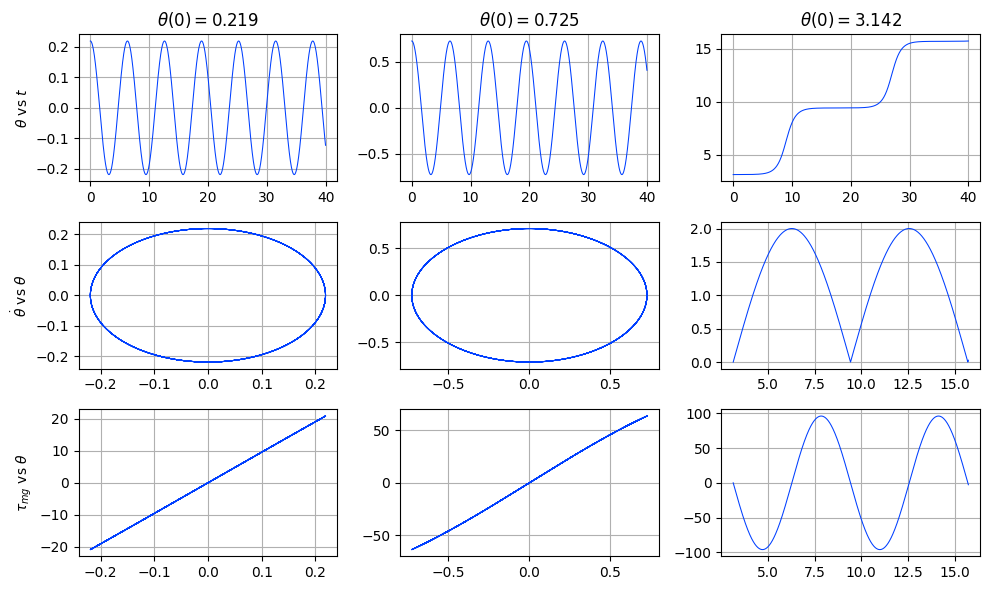

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(10,6))

axs[0][0].plot(t0, theta0)
axs[0][0].set_ylabel('$\\theta$ vs $t$')
axs[0][0].set_title('$\\theta(0) = {}$'.format(round(thetas[0], 3)))

axs[1][0].plot(theta0, omega0)
axs[1][0].set_ylabel('$\\dot{\\theta}$ vs $\\theta$')

axs[2][0].plot(theta0, torque0)

axs[2][0].set_ylabel('$\\tau_{mg}$ vs $\\theta$')

axs[0][1].plot(t1, theta1)
axs[0][1].set_title('$\\theta(0) = {}$'.format(round(thetas[1], 3)))

axs[1][1].plot(theta1, omega1)

axs[2][1].plot(theta1, torque1)


axs[0][2].plot(t2, theta2)
axs[0][2].set_title('$\\theta(0) = {}$'.format(round(thetas[2], 3)))


axs[1][2].plot(theta2, omega2)

axs[2][2].plot(theta2, torque2)

plt.show()

From the graphs, we can see that the phase portraits and torque graphs look like we would imagine. The one of particular interest is the phase portrait of the $\theta(0) = \pi$.

<b><i>Why does this one look so different?</i></b>

1. Notice the phase portrait is more rounded at the top than the bottom. The pendulum is swinging in circles and slows down at the top of the arc which coincides with the sharp peaks at the bottom. The peaking arise due to the large change in velocity that occurs over a short change in angle (because slope $= \Delta \dot{\theta}/\Delta\theta$)

2. The torque is osillatory because the pendulum is sweeping through all the possible theta (whereas in the other two graphs, the torque is bounded by the amplitudes)

Here's a cool visualization of the pendulum with the phase portraits: https://www.physicswithelliot.com/simple-pendulum-with-phase-space

Let's now consider a new pendulum, but with <b><font color='red'>friction and damping</font></b>. We'll code the full model below.

In [23]:
def realrealPen(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. This models a realistic pendulum with friction and a driving force.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    # Creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    # This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -(w0**2)*np.sin(y[0]) - alpha*y[1] + f*np.cos(w*t)

    return v


Now, let's see what happens to the oscillators when there is friction and damping involved.

In [31]:
w0 = 1 ; alpha = 0.2 ; f = 0.5 ; w = 2/3
thetas = [0.219, 0.725, -0.08]

for i in range(3):
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([thetas[i], 0], realrealPen, 2, 500, 1/10)
    vars()['theta'+str(i)], vars()['omega'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]

    vars()['friction'+str(i)] = np.zeros(len(vars()['omega'+str(i)]))
    vars()['driving'+str(i)] = np.zeros(len(vars()['omega'+str(i)]))

    current = vars()['friction'+str(i)]
    length = len(current)

    for j in range(length):
        vars()['friction'+str(i)][j] = -alpha*vars()['omega'+str(i)][j]
        vars()['driving'+str(i)][j] = f*np.cos(w*vars()['t'+str(i)][j])


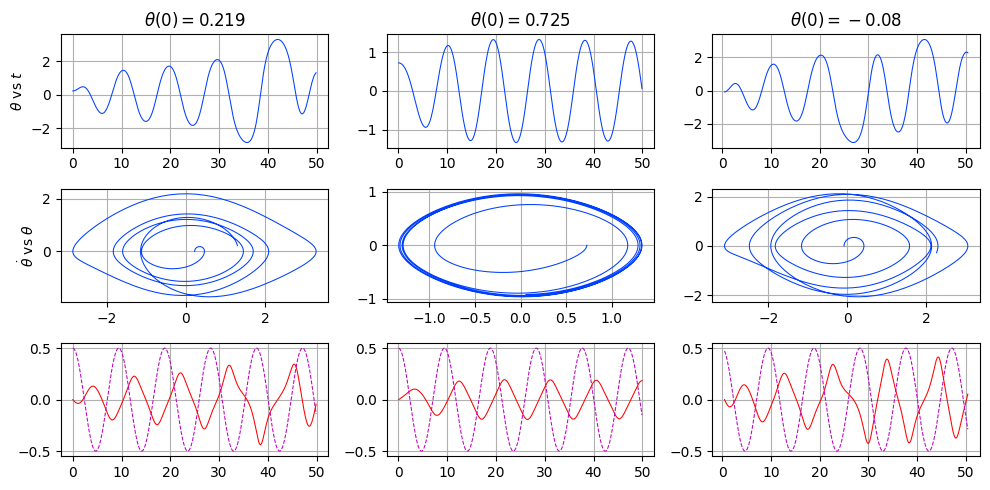

In [32]:
fig, axs = plt.subplots(3, 3, figsize=(10,5))

axs[0][0].plot(t0, theta0)
axs[0][0].set_ylabel('$\\theta$ vs $t$')
axs[0][0].set_title('$\\theta(0) = {}$'.format(round(thetas[0], 3)))

axs[1][0].plot(theta0, omega0)
axs[1][0].set_ylabel('$\\dot{\\theta}$ vs $\\theta$')

axs[2][0].plot(t0, friction0, 'r-')
axs[2][0].plot(t0, driving0, 'm--')

axs[0][1].plot(t1, theta1)
axs[0][1].set_title('$\\theta(0) = {}$'.format(round(thetas[1], 3)))

axs[1][1].plot(theta1, omega1)

axs[2][1].plot(t1, friction1, 'r-')
axs[2][1].plot(t1, driving1, 'm--')

axs[0][2].plot(t2, theta2)
axs[0][2].set_title('$\\theta(0) = {}$'.format(round(thetas[2], 3)))

axs[1][2].plot(theta2, omega2)

axs[2][2].plot(t2, friction2, 'r-')
axs[2][2].plot(t2, driving2, 'm--')

plt.show()

Let's try to gain some physical intuitions about the systems:

1. The loops on the phase plots correspond to times where the pendulum is oscillating. The friction force has caused it to lose enough energy to go over the top. The pendulum is able to go back over the top once it has added enough energy to be above that $E_{tot} = 2mgl\sin^2\left(\frac{\theta_0}{2}\right)$.

2. The connections between the loops in the phase plots occur when the pendulum is going over the top of the arc. Being on the top vs the bottom connection depends on whether the pendulum goes over the top of the swing clockwise or counterclockwise.

Below is a similar analysis, but varying the driving frequency $\omega$

In [33]:
w0 = 1 ; alpha = 0.2 ; f = 0.5
omegas = [0.6873, 0.695, 0.686]

for i in range(3):
    w = omegas[i]
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([-0.08, 0.8], realrealPen, 2, 2000, 1/10)
    vars()['theta'+str(i)], vars()['omega'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]

    vars()['friction'+str(i)] = np.zeros(len(vars()['omega'+str(i)]))
    vars()['driving'+str(i)] = np.zeros(len(vars()['omega'+str(i)]))

    current = vars()['friction'+str(i)]
    length = len(current)

    for j in range(length):
        vars()['friction'+str(i)][j] = -alpha*vars()['omega'+str(i)][j]
        vars()['driving'+str(i)][j] = f*np.cos(w*vars()['t'+str(i)][j])

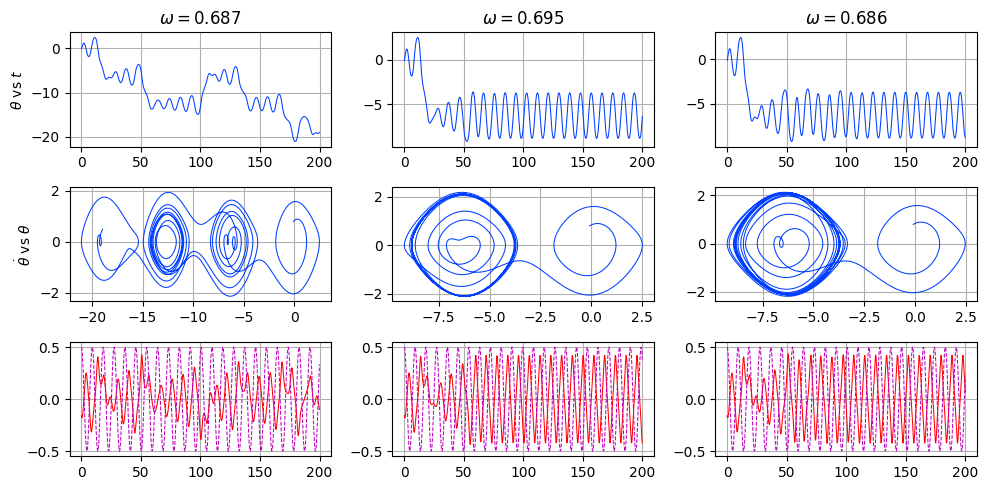

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(10,5))

axs[0][0].plot(t0, theta0)
axs[0][0].set_ylabel('$\\theta$ vs $t$')
axs[0][0].set_title('$\\omega = {}$'.format(round(omegas[0], 3)))

axs[1][0].plot(theta0, omega0)
axs[1][0].set_ylabel('$\\dot{\\theta}$ vs $\\theta$')

axs[2][0].plot(t0, friction0, 'r-')
axs[2][0].plot(t0, driving0, 'm--')

axs[0][1].plot(t1, theta1)
axs[0][1].set_title('$\\omega = {}$'.format(round(omegas[1], 3)))

axs[1][1].plot(theta1, omega1)

axs[2][1].plot(t1, friction1, 'r-')
axs[2][1].plot(t1, driving1, 'm--')

axs[0][2].plot(t2, theta2)
axs[0][2].set_title('$\\omega = {}$'.format(round(omegas[2], 3)))

axs[1][2].plot(theta2, omega2)

axs[2][2].plot(t2, friction2, 'r-')
axs[2][2].plot(t2, driving2, 'm--')

plt.show()

Not really much new to gain from this analysis, just basically more cool behavior.